# PROJECT 11: ATM Analysis
---
Mô tả tập dữ liệu (atm_transactions.csv):
Tập dữ liệu bao gồm 12 cột. Dữ liệu đã được làm sạch (ko chứa giá trị missing). bao gồm khoảng 30 000 giao dịch của 359 cây ATM tại thành số Izmir. Dữ liệu được tổng hợp theo mỗi giờ và trong thời gian 1 tuần: 2020-01-01  12:00:00 AM --> 2020-01-07  11:00:00 PM (Mỗi một cây ATM sẽ có 168 bản ghi. 
1. atmId : id của cây ATM (359 giá trị khác nhau)
2. atmName: tên của cây ATM (359 giá trị khác nhau)
3. atmCity: tên thành phố đặt cây ATM (1 giá trị - Izmir)
4. atmAddress: Địa chỉ của cây ATM
5. totalBalance: Tổng số tiền có trong cây ATM tại 1 thời điểm
6. numberIncomeTransaction: Tổng số giao dịch nhập tiền trong 1 giờ
7. numberOutcomeTransaction: Tổng số lần rút tiền trong 1 giờ
8. totalIncome: Tổng số tiền đã gửi vào cây ATM trong 1 giờ qua
9. totalOutcome: Tổng số tiền đã rút khỏi cây ATM trong 1 giờ qua
10. totalNumberTransaction: Tổng số giao dịch đã thực hiện với cây ATM trong một giờ qua = numberIncometransaction + numberOutcomeTransaction
11. day:Thứ trong tuần tổng hợp số liệu
12. transactionTime: Thời gian YYYY-MM-DD hh:mm:ss (tổng hợp theo từng giờ)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
%matplotlib inline

In [3]:
#Liên kết với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/Colab Notebooks/10Project/Data11_ATM Analysis/atm_transactions.csv"
data =pd.read_csv(path, encoding="utf_8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30156 entries, 0 to 30155
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   atmId                     30156 non-null  object
 1   atmName                   30156 non-null  object
 2   atmCity                   30156 non-null  object
 3   atmAddress                30156 non-null  object
 4   totalBalance              30156 non-null  int64 
 5   numberIncomeTransaction   30156 non-null  int64 
 6   numberOutcomeTransaction  30156 non-null  int64 
 7   totalIncome               30156 non-null  int64 
 8   totalOutcome              30156 non-null  int64 
 9   totalNumberTransaction    30156 non-null  int64 
 10  day                       30156 non-null  object
 11  transactionTime           30156 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.8+ MB


In [6]:
data.head()

,atmId,atmName,atmCity,atmAddress,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction,day,transactionTime
0,atm350000,ALİAĞA BAĞLI ŞB,Izmir,Aliağa Petkim Tesisleri,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
1,atm350001,ALİAĞA İSTİKLAL CADDESİ,Izmir,ATATÜRK İSTİKLAL CD. NO:97,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
2,atm350002,ALİAĞA PAZARYERİ,Izmir,ALİAĞA KAPALI PAZAR GİRİŞİ,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
3,atm350003,ALİAĞA SAHİL PARKI,Izmir,ALİAĞA HİKMET CD.SAHİL PARKI ÖNÜ,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
4,atm350004,ALİAĞA ŞUBE-1,Izmir,İstiklal Caddesi No: 64 / A,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00


In [7]:
data.tail()

,atmId,atmName,atmCity,atmAddress,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction,day,transactionTime
30151,atm35000354,TORBALI ŞUBE-2,Izmir,Tepeköy Mahallesi Ağalar Caddesi No: 10 / A,16665,58,73,4485,4330,131,Tuesday,2020-01-07 23:00:00
30152,atm35000355,URLA İSKELE,Izmir,URLA İSKELE,7925,41,99,2705,5810,140,Tuesday,2020-01-07 23:00:00
30153,atm35000356,URLA MEYDAN AVM ÖNÜ,Izmir,HACİ İSA MAHALLESİ BARATALI BULVARI NO:40/71 A...,25920,92,94,6135,6140,186,Tuesday,2020-01-07 23:00:00
30154,atm35000357,URLA ŞUBE-1,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,30295,68,91,4765,6535,159,Tuesday,2020-01-07 23:00:00
30155,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,11040,80,78,4675,5475,158,Tuesday,2020-01-07 23:00:00


In [8]:
data.describe()

,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction
count,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000
mean,24903.350245,48.157348,55.087711,3089.089733,3533.655989,103.245059
std,12140.702121,31.311923,33.360273,2063.646238,2200.795855,61.045114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15050.000000,16.000000,16.000000,1015.000000,1015.000000,27.000000
50%,25820.000000,50.000000,64.000000,3145.000000,4075.000000,125.000000
75%,35335.000000,76.000000,84.000000,4835.000000,5310.000000,153.000000
max,57050.000000,100.000000,100.000000,8440.000000,9710.000000,200.000000


In [9]:
data.describe(include=['O'])

,atmId,atmName,atmCity,atmAddress,day,transactionTime
count,30156,30156,30156,30156,30156,30156
unique,359,359,1,717,7,168
top,atm350005,TORBALI MEYDAN,Izmir,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,Saturday,2020-01-01 03:00:00
freq,84,84,30156,252,4308,285


### Trực quan hóa các cột dữ liệu số trong file
---

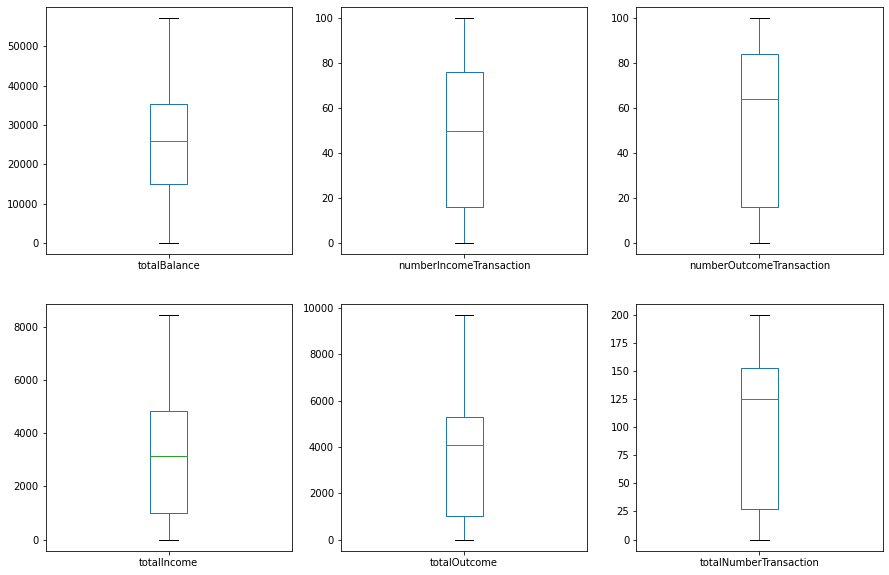

In [17]:
plt.rcParams['figure.figsize'] = [15, 10]
data.plot(kind="box",subplots=True,layout=(2,3),sharex=False,sharey=False)
plt.show()

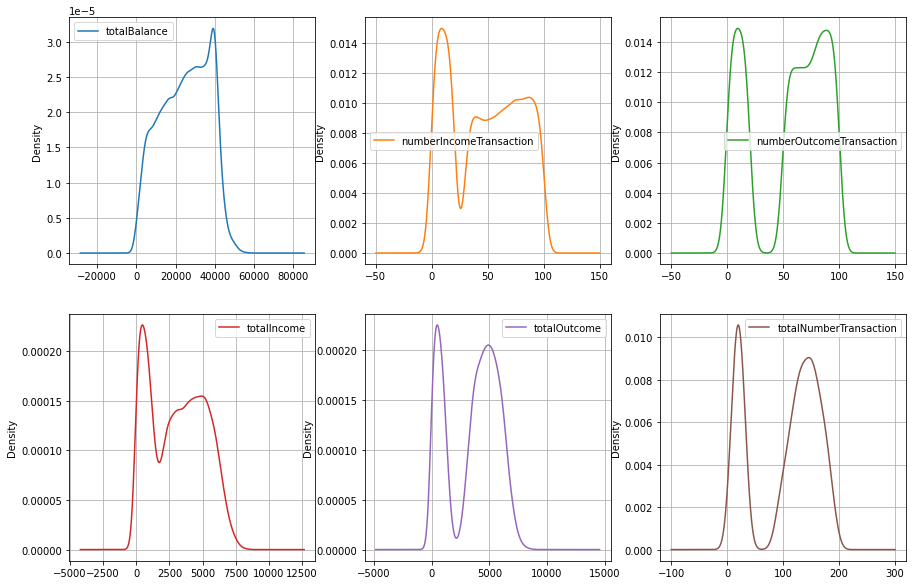

In [21]:
plt.rcParams['figure.figsize'] = [15, 10]
data.plot(kind="density",subplots=True,layout=(2,3),sharex=False,sharey=False, grid=True)
plt.show()

In [22]:
data.atmId.value_counts()

atm350005      84
atm35000163    84
atm35000302    84
atm35000178    84
atm35000203    84
               ..
atm35000117    84
atm35000246    84
atm35000116    84
atm35000142    84
atm35000146    84
Name: atmId, Length: 359, dtype: int64

In [25]:
359*7*24

60312

In [5]:
data[data.atmId=='atm35000358'].head()

,atmId,atmName,atmCity,atmAddress,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction,day,transactionTime
358,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,40465,11,5,785,320,16,Wednesday,2020-01-01 01:00:00
717,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,38980,6,18,275,1335,24,Wednesday,2020-01-01 03:00:00
1076,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,40345,18,2,1190,205,20,Wednesday,2020-01-01 05:00:00
1435,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,41050,17,11,1125,390,28,Wednesday,2020-01-01 07:00:00
1794,atm35000358,URLA ŞUBE-2,Izmir,Hacı İsa Mahallesi Bülent Baratalı Bulvarı No: 74,39835,95,89,6445,5300,184,Wednesday,2020-01-01 09:00:00


In [65]:
#Tách lấy tập dữ liệu thông tin cây ATM bao gồm: ID, Name, City, Address
df_ATM = data[['atmId','atmName','atmCity','atmAddress']].copy()
#Xóa các bản ghi duplicate
df_ATM.drop_duplicates(['atmId','atmName'],inplace=True)
df_ATM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   atmId       359 non-null    object
 1   atmName     359 non-null    object
 2   atmCity     359 non-null    object
 3   atmAddress  359 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


In [66]:
df_ATM.head()

,atmId,atmName,atmCity,atmAddress
0,atm350000,ALİAĞA BAĞLI ŞB,Izmir,Aliağa Petkim Tesisleri
1,atm350001,ALİAĞA İSTİKLAL CADDESİ,Izmir,ATATÜRK İSTİKLAL CD. NO:97
2,atm350002,ALİAĞA PAZARYERİ,Izmir,ALİAĞA KAPALI PAZAR GİRİŞİ
3,atm350003,ALİAĞA SAHİL PARKI,Izmir,ALİAĞA HİKMET CD.SAHİL PARKI ÖNÜ
4,atm350004,ALİAĞA ŞUBE-1,Izmir,İstiklal Caddesi No: 64 / A


## 1) Thống kê số lượng giao dịch tại các cây ATM
---

In [7]:
#nhóm dữ liệu theo atmId
group_id = data.groupby('atmId')

## 1.1) Tổng số giao dịch (cả nhập và rút tiền)
---

In [43]:
#Tính tổng số giao dịch theo từng cây ATM
totaltransaction = group_id['totalNumberTransaction'].agg(np.sum)
totaltransaction = totaltransaction.sort_values(axis=0, ascending=False)

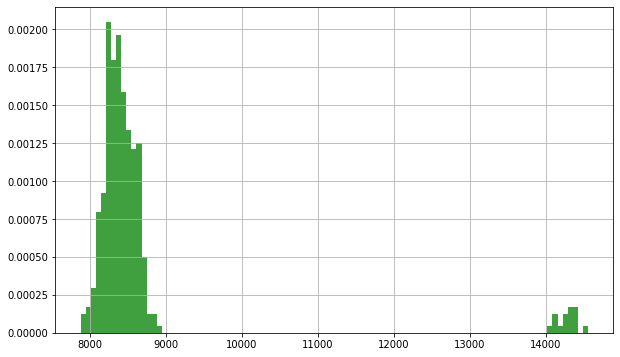

In [42]:
plt.rcParams['figure.figsize'] = [10, 6]
n, bins, patches = plt.hist(totaltransaction, 100, density=True, facecolor='g', alpha=0.75)
plt.grid()

{'boxes': [<matplotlib.lines.Line2D at 0x7fe330535ef0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe330540940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe33054a400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe33054a080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe330540240>,
  <matplotlib.lines.Line2D at 0x7fe3305405c0>]}

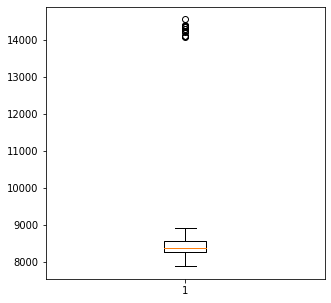

In [25]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.boxplot(totaltransaction.values)

In [27]:
totaltransaction.head(20)

atmId
atm3500087     14554
atm35000206    14391
atm3500056     14387
atm35000167    14386
atm35000356    14381
atm3500083     14348
atm35000124    14339
atm35000314    14295
atm3500076     14294
atm35000272    14252
atm35000274    14242
atm35000168    14234
atm35000339    14203
atm35000275    14113
atm35000317    14110
atm3500010     14093
atm35000227    14069
atm3500025      8918
atm35000195     8877
atm35000139     8862
Name: totalNumberTransaction, dtype: int64

In [46]:
totaltransaction.tail()

atmId
atm3500021     7955
atm35000271    7955
atm35000338    7949
atm35000348    7895
atm350001      7884
Name: totalNumberTransaction, dtype: int64

In [45]:
#Danh sách các cây ATM có số lượng giao dịch lớn (>10 000)
print('Danh sách các cây ATM có số lượng giao dịch lớn (>10 000):')
print(totaltransaction[totaltransaction>10000])
print('Số lượng: ', totaltransaction[totaltransaction>10000].count())

Danh sách các cây ATM có số lượng giao dịch lớn (>10 000):
atmId
atm3500087     14554
atm35000206    14391
atm3500056     14387
atm35000167    14386
atm35000356    14381
atm3500083     14348
atm35000124    14339
atm35000314    14295
atm3500076     14294
atm35000272    14252
atm35000274    14242
atm35000168    14234
atm35000339    14203
atm35000275    14113
atm35000317    14110
atm3500010     14093
atm35000227    14069
Name: totalNumberTransaction, dtype: int64
Số lượng:  17


**NHẬN XÉT 1**
---
Trong số 359 cây ATM, số lượng giao dịch (bao gồm gửi gửi tiền và rút tiền) chia thành hai nhóm.
* Nhóm 1: bao gồm 17 cây ATM có số lượng giao dịch lớn hơn hẳn các cây ATM còn lại. Số lượng giao dịch [14 000  --> 14 600]; Nhóm 1 gấp ~1.7 lần nhóm 2
* Nhóm 2: Bao gồm 432 cây ATM còn lại, có số lượng giao dịch tương đối đồng đều nhau. [7 884 - 8 918]

In [90]:
totaltransaction_max = totaltransaction[totaltransaction>10000]
list_id = totaltransaction_max.index
list_id = list(list_id)
print('Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn):', totaltransaction_max.count())
print('Danh sách:\n')
df_ATM[df_ATM['atmId'].isin(list_id)].head(20)

Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn): 17
Danh sách:



,atmId,atmName,atmCity,atmAddress
10,atm3500010,AGORA AVM/BALÇOVA,Izmir,MİTHATPAŞA CAD.NO:1448/A BALÇOVA
95,atm3500056,BORNOVA MYVİA AVM ÖNÜ,Izmir,KAZIMDİRİK MAHALLESİ SANAYİ CADDESİ NO:31 Z:6 ...
111,atm3500076,KIDS MALL AVM,Izmir,KAZIM DİRİK MH.372.SOK.BORNOVA
118,atm3500083,PARK BORNOVA AVM,Izmir,İZMİR PARK İÇİ
122,atm3500087,POINT BORNOVA AVM,Izmir,4174 SK.NO:4 BAĞBURNU MEVKİİ
159,atm35000124,CADDE PLUS AVM ÇEŞME,Izmir,SAKARYA MAHALLESİ 2001. SK. NO:119
202,atm35000167,İZMİR OPTIMUM AVM -2,Izmir,DOKUZ EYLÜL MH. AKÇAY CD. NO:101
203,atm35000168,İZMİR OPTİMUM AVM,Izmir,OPTİMUM AVM GAZİEMİR
241,atm35000206,EGEPARK MAVİŞEHİR AVM,Izmir,EGEPARK AVM
262,atm35000227,MAVİBAHÇE AVM,Izmir,MAVİBAHÇE AVM 2040/3 SK.


## 1.2a) Thống kê số giao dịch gửi tiền
---

In [73]:
#Tính tổng số giao dịch theo từng cây ATM
totalincome = group_id['numberIncomeTransaction'].agg(np.sum)
totalincome = totalincome.sort_values(axis=0, ascending=False)
totalincome

atmId
atm3500087     6926
atm35000356    6888
atm35000206    6829
atm35000167    6825
atm3500076     6805
               ... 
atm35000241    3565
atm35000264    3562
atm35000348    3547
atm35000291    3538
atm350001      3526
Name: numberIncomeTransaction, Length: 359, dtype: int64

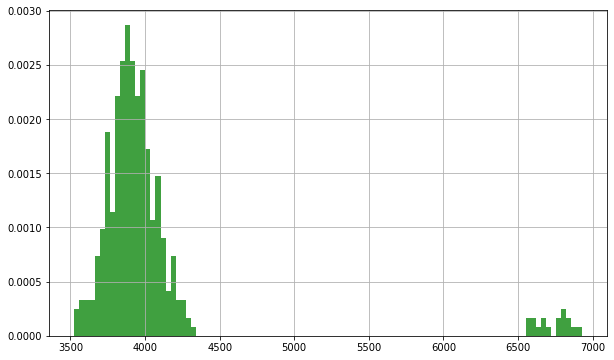

In [74]:
plt.rcParams['figure.figsize'] = [10, 6]
n, bins, patches = plt.hist(totalincome, 100, density=True, facecolor='g', alpha=0.75)
plt.grid()

In [75]:
totalincome.head(20)

atmId
atm3500087     6926
atm35000356    6888
atm35000206    6829
atm35000167    6825
atm3500076     6805
atm3500056     6802
atm35000124    6798
atm3500083     6789
atm35000339    6777
atm35000272    6720
atm35000314    6666
atm35000274    6666
atm35000168    6653
atm3500010     6613
atm35000317    6602
atm35000275    6581
atm35000227    6554
atm3500025     4319
atm35000236    4305
atm35000193    4284
Name: numberIncomeTransaction, dtype: int64

In [96]:
#Lọc các cây ATM có số giao dịch gửi tiền >5000
totalincome_max = totalincome[totalincome>5000]
list_id1 = totalincome_max.index
list_id1 = list(list_id1)
print('Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn):', totalincome_max.count())
print('Danh sách:\n')
df_ATM[df_ATM['atmId'].isin(list_id1)].head(20)

Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn): 17
Danh sách:



,atmId,atmName,atmCity,atmAddress
10,atm3500010,AGORA AVM/BALÇOVA,Izmir,MİTHATPAŞA CAD.NO:1448/A BALÇOVA
95,atm3500056,BORNOVA MYVİA AVM ÖNÜ,Izmir,KAZIMDİRİK MAHALLESİ SANAYİ CADDESİ NO:31 Z:6 ...
111,atm3500076,KIDS MALL AVM,Izmir,KAZIM DİRİK MH.372.SOK.BORNOVA
118,atm3500083,PARK BORNOVA AVM,Izmir,İZMİR PARK İÇİ
122,atm3500087,POINT BORNOVA AVM,Izmir,4174 SK.NO:4 BAĞBURNU MEVKİİ
159,atm35000124,CADDE PLUS AVM ÇEŞME,Izmir,SAKARYA MAHALLESİ 2001. SK. NO:119
202,atm35000167,İZMİR OPTIMUM AVM -2,Izmir,DOKUZ EYLÜL MH. AKÇAY CD. NO:101
203,atm35000168,İZMİR OPTİMUM AVM,Izmir,OPTİMUM AVM GAZİEMİR
241,atm35000206,EGEPARK MAVİŞEHİR AVM,Izmir,EGEPARK AVM
262,atm35000227,MAVİBAHÇE AVM,Izmir,MAVİBAHÇE AVM 2040/3 SK.


In [82]:
list_id.sort()==list_id1.sort()

True

## 1.2b) Thống kê số giao dịch rút tiền
---

In [97]:
#Tính tổng số giao dịch theo từng cây ATM
totaloutcome = group_id['numberOutcomeTransaction'].agg(np.sum)
totaloutcome = totaloutcome.sort_values(axis=0, ascending=False)
totaloutcome

atmId
atm35000314    7629
atm3500087     7628
atm3500056     7585
atm35000168    7581
atm35000274    7576
               ... 
atm3500016     4269
atm35000220    4235
atm35000152    4215
atm35000185    4210
atm35000271    4191
Name: numberOutcomeTransaction, Length: 359, dtype: int64

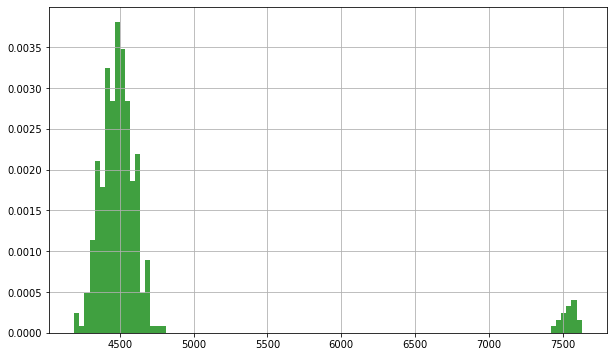

In [98]:
plt.rcParams['figure.figsize'] = [10, 6]
n, bins, patches = plt.hist(totaloutcome, 100, density=True, facecolor='g', alpha=0.75)
plt.grid()

In [99]:
totaloutcome.head(20)

atmId
atm35000314    7629
atm3500087     7628
atm3500056     7585
atm35000168    7581
atm35000274    7576
atm35000206    7562
atm35000167    7561
atm3500083     7559
atm35000124    7541
atm35000275    7532
atm35000272    7532
atm35000227    7515
atm35000317    7508
atm35000356    7493
atm3500076     7489
atm3500010     7480
atm35000339    7426
atm35000187    4797
atm35000155    4766
atm35000346    4712
Name: numberOutcomeTransaction, dtype: int64

In [100]:
#Lọc các cây ATM có số giao dịch gửi tiền >5000
totaloutcome_max = totaloutcome[totaloutcome>5000]
list_id2 = totaloutcome_max.index
list_id2 = list(list_id2)
print('Số lượng cây ATM trong nhóm 1 (Có số giao dịch rút tiền lớn):', totaloutcome_max.count())
print('Danh sách:\n')
df_ATM[df_ATM['atmId'].isin(list_id2)].head(20)

Số lượng cây ATM trong nhóm 1 (Có số giao dịch rút tiền lớn): 17
Danh sách:



,atmId,atmName,atmCity,atmAddress
10,atm3500010,AGORA AVM/BALÇOVA,Izmir,MİTHATPAŞA CAD.NO:1448/A BALÇOVA
95,atm3500056,BORNOVA MYVİA AVM ÖNÜ,Izmir,KAZIMDİRİK MAHALLESİ SANAYİ CADDESİ NO:31 Z:6 ...
111,atm3500076,KIDS MALL AVM,Izmir,KAZIM DİRİK MH.372.SOK.BORNOVA
118,atm3500083,PARK BORNOVA AVM,Izmir,İZMİR PARK İÇİ
122,atm3500087,POINT BORNOVA AVM,Izmir,4174 SK.NO:4 BAĞBURNU MEVKİİ
159,atm35000124,CADDE PLUS AVM ÇEŞME,Izmir,SAKARYA MAHALLESİ 2001. SK. NO:119
202,atm35000167,İZMİR OPTIMUM AVM -2,Izmir,DOKUZ EYLÜL MH. AKÇAY CD. NO:101
203,atm35000168,İZMİR OPTİMUM AVM,Izmir,OPTİMUM AVM GAZİEMİR
241,atm35000206,EGEPARK MAVİŞEHİR AVM,Izmir,EGEPARK AVM
262,atm35000227,MAVİBAHÇE AVM,Izmir,MAVİBAHÇE AVM 2040/3 SK.


In [101]:
list_id.sort()==list_id2.sort()

True

## **NHẬN XÉT 2:**
---
Tương tự như với tổng số giao dịch, số giao dịch gửi tiền, rút tiền cũng chia thành 2 nhóm với số lượng giao dịch khác nhau. 17 cây ATM có số lượng giao dịch gửi tiền, rút tiền cao hơn hẳn các cây ATM còn lại. Danh sách cây này cũng chính là 17 cây ATM giao dịch lớn nhất.

## 1.3) Thống kê lượng tiền giao dịch
---

### 1.3a) Thông kê lượng tiền gửi
---

In [102]:
#Tính tổng số giao dịch theo từng cây ATM
totalIncome = group_id['totalIncome'].agg(np.sum)
totalIncome = totalIncome.sort_values(axis=0, ascending=False)

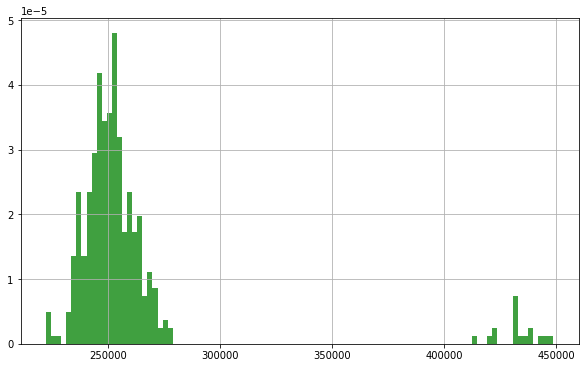

In [103]:
plt.rcParams['figure.figsize'] = [10, 6]
n, bins, patches = plt.hist(totalIncome, 100, density=True, facecolor='g', alpha=0.75)
plt.grid()

In [104]:
#Danh sách các cây ATM có số lượng giao dịch lớn (>10 000)
print('Danh sách các cây ATM có số tiền gửi lớn (>350 000):')
print(totalIncome[totalIncome>350000])
print('Số lượng: ', totalIncome[totalIncome>350000].count())

Danh sách các cây ATM có số tiền gửi lớn (>350 000):
atmId
atm3500087     448765
atm35000167    444580
atm35000356    443395
atm3500076     438790
atm35000124    438655
atm35000206    436040
atm3500083     433720
atm35000274    432530
atm35000339    432110
atm35000314    431760
atm3500056     431590
atm35000168    431425
atm35000272    430840
atm35000275    423290
atm35000227    422800
atm35000317    419925
atm3500010     414725
Name: totalIncome, dtype: int64
Số lượng:  17


In [108]:
totalIncome_max = totalIncome[totalIncome>350000]
list_id3 = totalIncome_max.index
list_id3 = list(list_id3)
print('Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn):', totalIncome_max.count())
print('Danh sách:\n')
df_ATM[df_ATM['atmId'].isin(list_id3)].head(20)

Số lượng cây ATM trong nhóm 1 (Có số giao dịch lớn): 17
Danh sách:



,atmId,atmName,atmCity,atmAddress
10,atm3500010,AGORA AVM/BALÇOVA,Izmir,MİTHATPAŞA CAD.NO:1448/A BALÇOVA
95,atm3500056,BORNOVA MYVİA AVM ÖNÜ,Izmir,KAZIMDİRİK MAHALLESİ SANAYİ CADDESİ NO:31 Z:6 ...
111,atm3500076,KIDS MALL AVM,Izmir,KAZIM DİRİK MH.372.SOK.BORNOVA
118,atm3500083,PARK BORNOVA AVM,Izmir,İZMİR PARK İÇİ
122,atm3500087,POINT BORNOVA AVM,Izmir,4174 SK.NO:4 BAĞBURNU MEVKİİ
159,atm35000124,CADDE PLUS AVM ÇEŞME,Izmir,SAKARYA MAHALLESİ 2001. SK. NO:119
202,atm35000167,İZMİR OPTIMUM AVM -2,Izmir,DOKUZ EYLÜL MH. AKÇAY CD. NO:101
203,atm35000168,İZMİR OPTİMUM AVM,Izmir,OPTİMUM AVM GAZİEMİR
241,atm35000206,EGEPARK MAVİŞEHİR AVM,Izmir,EGEPARK AVM
262,atm35000227,MAVİBAHÇE AVM,Izmir,MAVİBAHÇE AVM 2040/3 SK.


In [113]:
list_id1.sort() == list_id3.sort()

True